In [1]:
%matplotlib inline

In [2]:
import pandas as pd

## Dane

In [3]:
wolne = ['książka', 'książka', 'książka', 'książka', 'telewizja', 'książka', 'telewizja', 'telewizja', 'książka', 
         'książka', 'telewizja', 'telewizja', 'telewizja', 'książka', 'telewizja', 'telewizja', 'telewizja', 'książka', 
         'książka', 'telewizja']
napój = ['herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'kawa', 'herbata', 'herbata', 
         'herbata', 'kawa', 'kawa', 'herbata', 'kawa', 'herbata', 'herbata', 'herbata', 'kawa']
wyjście = ['teatr', 'teatr', 'kino', 'kino', 'teatr', 'kino', 'kino', 'teatr', 'kino', 'kino', 'kino', 'teatr', 'teatr',
           'teatr', 'kino', 'kino', 'teatr', 'teatr', 'teatr', 'teatr']
po_roku = ['Tak', 'Nie', 'Tak', 'Tak', 'Nie', 'Tak', 'Nie', 'Tak', 'Nie', 'Tak', 'Nie', 'Nie', 'Nie', 'Tak', 'Nie', 
           'Nie', 'Tak', 'Nie', 'Nie', 'Tak']

## Przerabianie list na data frame

In [4]:
prenumeratorzy = pd.DataFrame({"wolne": wolne, "napój": napój, "wyjście": wyjście, "po_roku":po_roku})

In [5]:
prenumeratorzy

,wolne,napój,wyjście,po_roku
0,książka,herbata,teatr,Tak
1,książka,kawa,teatr,Nie
2,książka,kawa,kino,Tak
3,książka,herbata,kino,Tak
4,telewizja,kawa,teatr,Nie
5,książka,kawa,kino,Tak
6,telewizja,herbata,kino,Nie
7,telewizja,kawa,teatr,Tak
8,książka,kawa,kino,Nie
9,książka,herbata,kino,Tak


## Entropia

* Entropia jest wartością którą chcemy zminimalizować
* Jeżeli zbiór na którym pracujemy jest wymieszany “pół na pół” to entropia będzie wynosić 1 (maksimum)
* Jeżeli w zbiorze mamy tylko jedną klasę, to entropia będzie równa 0 (minimum)

Entropię wyznaczamy wzorem:

$$H(X) = -\sum_{i = 1}^{n}p_i \cdot log_2p_i$$

Dla dwoch klas będzie to więc:

$$H(X) = -p_1 \cdot log_2p_1 - (1-p_1) \cdot log_2(1-p_1)$$

## Wykres entropii binarnej

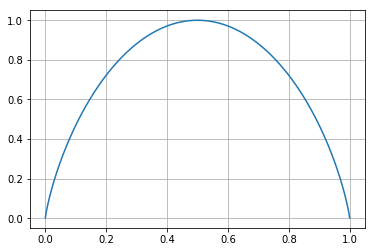

In [6]:
import pylab
import numpy as np

x = np.linspace(0.0001,0.9999,1000) # 1000 punktów
y = -x * np.log2(x) - (1-x) * np.log2(1-x) # wyznaczenie wartości entropii

# wykres
pylab.plot(x,y)
pylab.grid()
pylab.show()

In [10]:
P_Tak = len(prenumeratorzy[prenumeratorzy["po_roku"] == "Tak"]) / len(prenumeratorzy)
P_Nie = len(prenumeratorzy[prenumeratorzy["po_roku"] == "Nie"]) / len(prenumeratorzy)

In [11]:
P_Tak, P_Nie

(0.45, 0.55)

In [12]:
H_całość = -P_Tak * np.log2(P_Tak) - P_Nie * np.log2(P_Nie)

In [13]:
H_całość

0.9927744539878083

## Podział po czasie wolnym

In [14]:
prenumeratorzy_książka = prenumeratorzy[prenumeratorzy["wolne"] == "książka"]
prenumeratorzy_telewizja = prenumeratorzy[prenumeratorzy["wolne"] == "telewizja"]

In [16]:
P_Tak_książka = len(prenumeratorzy_książka[prenumeratorzy_książka["po_roku"] == "Tak"]) / len(prenumeratorzy_książka)
P_Nie_książka = len(prenumeratorzy_książka[prenumeratorzy_książka["po_roku"] == "Nie"]) / len(prenumeratorzy_książka)
H_książka = -P_Tak_książka * np.log2(P_Tak_książka) - P_Nie_książka * np.log2(P_Nie_książka)

In [17]:
H_książka

0.9709505944546686

## Entropia jako funkcja

In [18]:
def obliczenie_entropii(data_frame):
    p_tak = len(data_frame[data_frame["po_roku"] == "Tak"]) / len(data_frame)
    p_nie = 1 - p_tak
    H = -p_tak * np.log2(p_tak) - p_nie * np.log2(p_nie)
    return H

In [19]:
H_telewizja = obliczenie_entropii(prenumeratorzy_telewizja)

In [20]:
H_telewizja

0.8812908992306927

## Podział po napojach

In [21]:
prenumeratorzy_kawa = prenumeratorzy[prenumeratorzy["napój"] == "kawa"]
prenumeratorzy_herbata = prenumeratorzy[prenumeratorzy["napój"] == "herbata"]

In [22]:
H_kawa = obliczenie_entropii(prenumeratorzy_kawa)
H_herbata = obliczenie_entropii(prenumeratorzy_herbata)

In [23]:
H_kawa, H_herbata

(1.0, 0.9709505944546686)

In [25]:
prenumeratorzy_kawa

,wolne,napój,wyjście,po_roku
1,książka,kawa,teatr,Nie
2,książka,kawa,kino,Tak
4,telewizja,kawa,teatr,Nie
5,książka,kawa,kino,Tak
7,telewizja,kawa,teatr,Tak
8,książka,kawa,kino,Nie
12,telewizja,kawa,teatr,Nie
13,książka,kawa,teatr,Tak
15,telewizja,kawa,kino,Nie
19,telewizja,kawa,teatr,Tak


## Podział po miejscach "na mieście"

In [26]:
H_kino = obliczenie_entropii(prenumeratorzy[prenumeratorzy["wyjście"] == "kino"])
H_teatr = obliczenie_entropii(prenumeratorzy[prenumeratorzy["wyjście"] == "teatr"])
print(H_kino, H_teatr)

0.9910760598382222 0.9940302114769565


## Lepsza mała entropia w małym zbiorze, czy taka sobie w równych zbiorach?


$$Przytrost \, informacji(rodzic, dzieci) = entropia(rodzic) - [p(c_1) \cdot entropia (c_1) + p(c_2) \cdot entropia (c_2) + ...]$$

In [27]:
H_całość

0.9927744539878083

### Czas wolny

In [28]:
H_książka, H_telewizja

(0.9709505944546686, 0.8812908992306927)

In [32]:
prenumeratorzy["wolne"].value_counts(normalize = True)["książka"]

0.5

In [33]:
P_książka = prenumeratorzy["wolne"].value_counts(normalize = True)["książka"]
P_telewizja = prenumeratorzy["wolne"].value_counts(normalize = True)["telewizja"]
P_książka, P_telewizja

(0.5, 0.5)

In [34]:
PI_wolne = H_całość - P_książka * H_książka - P_telewizja * H_telewizja
PI_wolne

0.06665370714512764

### Preferowany napój

In [35]:
H_kawa, H_herbata

(1.0, 0.9709505944546686)

In [36]:
P_kawa = prenumeratorzy["napój"].value_counts(normalize = True)["kawa"]
P_herbata = prenumeratorzy["napój"].value_counts(normalize = True)["herbata"]
P_kawa, P_herbata

(0.5, 0.5)

In [37]:
PI_napój = H_całość - P_kawa * H_kawa - P_herbata * H_herbata
PI_napój

0.00729915676047399

### Ulubione atrakcje "na mieście"

In [38]:
H_kino, H_teatr

(0.9910760598382222, 0.9940302114769565)

In [39]:
P_kino = prenumeratorzy["wyjście"].value_counts(normalize = True)["kino"]
P_teatr = prenumeratorzy["wyjście"].value_counts(normalize = True)["teatr"]
P_kino, P_teatr

(0.45, 0.55)

In [40]:
PI_wyjście = H_całość - P_kino * H_kino - P_teatr * H_teatr
PI_wyjście

7.361074828204917e-05

In [41]:
PI_wolne, PI_napój, PI_wyjście

(0.06665370714512764, 0.00729915676047399, 7.361074828204917e-05)

In [43]:
prenumeratorzy[prenumeratorzy["wolne"] == "książka"]

,wolne,napój,wyjście,po_roku
0,książka,herbata,teatr,Tak
1,książka,kawa,teatr,Nie
2,książka,kawa,kino,Tak
3,książka,herbata,kino,Tak
5,książka,kawa,kino,Tak
8,książka,kawa,kino,Nie
9,książka,herbata,kino,Tak
13,książka,kawa,teatr,Tak
17,książka,herbata,teatr,Nie
18,książka,herbata,teatr,Nie


In [44]:
prenumeratorzy[prenumeratorzy["wolne"] == "telewizja"]

,wolne,napój,wyjście,po_roku
4,telewizja,kawa,teatr,Nie
6,telewizja,herbata,kino,Nie
7,telewizja,kawa,teatr,Tak
10,telewizja,herbata,kino,Nie
11,telewizja,herbata,teatr,Nie
12,telewizja,kawa,teatr,Nie
14,telewizja,herbata,kino,Nie
15,telewizja,kawa,kino,Nie
16,telewizja,herbata,teatr,Tak
19,telewizja,kawa,teatr,Tak


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
prenumeratorzy.head()

,wolne,napój,wyjście,po_roku
0,książka,herbata,teatr,Tak
1,książka,kawa,teatr,Nie
2,książka,kawa,kino,Tak
3,książka,herbata,kino,Tak
4,telewizja,kawa,teatr,Nie


In [48]:
prenumeratorzy["wolne"], wolne_kody = pd.factorize(prenumeratorzy["wolne"])
prenumeratorzy["napój"], napój_kody = pd.factorize(prenumeratorzy["napój"])
prenumeratorzy["wyjście"], wyjście_kody = pd.factorize(prenumeratorzy["wyjście"])
prenumeratorzy["po_roku"], po_roku_kody = pd.factorize(prenumeratorzy["po_roku"])

In [49]:
prenumeratorzy.head()

,wolne,napój,wyjście,po_roku
0,0,0,0,0
1,0,1,0,1
2,0,1,1,0
3,0,0,1,0
4,1,1,0,1


In [50]:
wolne_kody

Index(['książka', 'telewizja'], dtype='object')

In [52]:
X = prenumeratorzy.drop(["po_roku"], axis = 1)
y = prenumeratorzy["po_roku"]

In [62]:
klasyfikator = DecisionTreeClassifier(criterion = "entropy", max_depth = 10)

In [63]:
klasyfikator.fit(X = X, y = y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
import graphviz
from sklearn import tree

In [65]:
drzewo = tree.export_graphviz(klasyfikator, out_file=None, 
                         feature_names=X.columns,  
                         class_names=po_roku_kody,  
                         filled=True, rounded=True,  
                         special_characters=True)  

In [66]:
graf = graphviz.Source(drzewo)

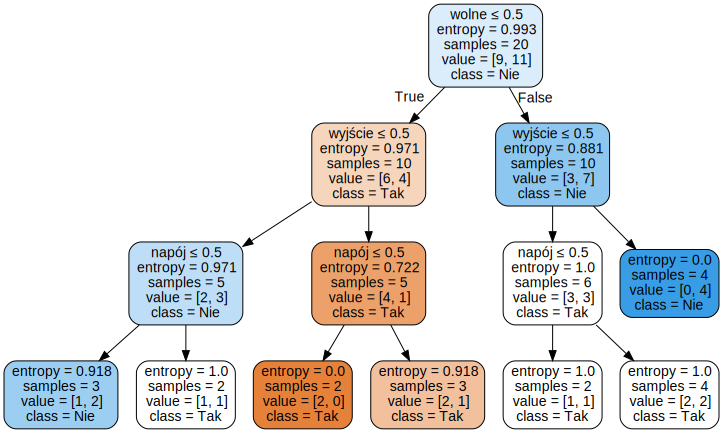

In [67]:
graf

In [68]:
wyjście_kody, wolne_kody, napój_kody

(Index(['teatr', 'kino'], dtype='object'),
 Index(['książka', 'telewizja'], dtype='object'),
 Index(['herbata', 'kawa'], dtype='object'))

In [69]:
klasyfikator.score(X, y)

0.7